# DATA DESCRIPTION

The data can be found at https://ssh.datastations.nl/dataverse/root. For data to become available, registration to the website
is required, while access to the datasets must be requested by the Data station of Social Sciences and Humanities for free.
Data were collected for years 2018 - 2022. 
The dataset is a trip diary survey where people within Netherlands record their trips and answer demographic questions. The survey is called
ODIN and is conducted by the Central Bureau of Statistics in Netherlands annualy. 
Features within the dataset are decribed in Dutch so it was required to translate them using Google and following the Codebook Guideline
also available at the same link as above.
The original datasets for each year, as downloaded from the website, contain about 150000-200000 trips/rows and about 100 columns.
From these datasets, trip related features were selected such as distance and duration of the trip and some demographic features such as 
household size and number of vehicles in the house. After the features were extracted for each years, the data were merged and the resulting dataset
can be seen below

# Differences with Paper

2. The paper uses data from 2010-2012 which are a little outdated. They also use 17 features. We will use data from 2018-2022 experimenting with  different set of features.  Also our dataset
   is significantly larger


In [768]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from itertools import cycle
import warnings
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [769]:
zip_file_path = 'Netherlands_data_prototype.zip'
csv_file_inside_zip = 'Netherlands_data_prototype.csv'

In [770]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [771]:
warnings.filterwarnings("ignore")

In [772]:
df

,OPID,HHPers,HHSam,Geslacht,Leeftijd,Herkomst,Opleiding,OPRijbewijsAu,HHAuto,HMopeds,...,Feestdag,Toer,KMotiefV,VertProv,AankProv,AfstR,RReisduur,RVertUur,RVertMin,KRvm
0,5.583410e+10,1,1,1,42,1,3,1,1,0,...,0,0,4,1,1,60,15,10,30,1
1,5.583410e+10,1,1,1,42,1,3,1,1,0,...,0,0,4,1,1,60,10,11,15,1
2,5.583410e+10,1,1,1,42,1,3,1,1,0,...,0,0,6,1,1,10,5,15,55,5
3,5.583410e+10,1,1,1,42,1,3,1,1,0,...,0,0,6,1,1,10,5,18,30,5
4,5.583410e+10,2,2,1,42,1,3,1,1,0,...,0,0,4,1,1,30,10,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3.100000e+11,3,6,2,49,3,4,1,1,0,...,0,0,5,8,8,110,35,15,56,1
817122,3.100000e+11,3,6,2,49,3,4,1,1,0,...,0,0,4,8,8,11,7,16,50,6
817123,3.100000e+11,3,6,2,49,3,4,1,1,0,...,0,0,4,8,8,6,5,17,15,6
817124,3.100000e+11,3,6,2,49,3,4,1,1,0,...,0,0,7,8,8,63,15,18,20,1


In [773]:
df = df.drop("OPID", axis=1)
df

,HHPers,HHSam,Geslacht,Leeftijd,Herkomst,Opleiding,OPRijbewijsAu,HHAuto,HMopeds,HHEFiets,...,Feestdag,Toer,KMotiefV,VertProv,AankProv,AfstR,RReisduur,RVertUur,RVertMin,KRvm
0,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,15,10,30,1
1,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,10,11,15,1
2,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,15,55,5
3,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,18,30,5
4,2,2,1,42,1,3,1,1,0,0,...,0,0,4,1,1,30,10,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,6,2,49,3,4,1,1,0,0,...,0,0,5,8,8,110,35,15,56,1
817122,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,11,7,16,50,6
817123,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,6,5,17,15,6
817124,3,6,2,49,3,4,1,1,0,0,...,0,0,7,8,8,63,15,18,20,1


In [774]:
print(df.columns)

Index(['HHPers', 'HHSam', 'Geslacht', 'Leeftijd', 'Herkomst', 'Opleiding',
       'OPRijbewijsAu', 'HHAuto', 'HMopeds', 'HHEFiets', 'Jaar', 'Maand',
       'Weekdag', 'Feestdag', 'Toer', 'KMotiefV', 'VertProv', 'AankProv',
       'AfstR', 'RReisduur', 'RVertUur', 'RVertMin', 'KRvm'],
      dtype='object')


In [775]:
new_columns= {"HHPers": "People_in_house", "HHSam": "Household_composition", "Geslacht": "Gender", "Leeftijd": "Age",
              "Herkomst": "Background", "Opleiding": "Education", "OPRijbewijsAu": "Driver_license", "HHAuto": "Cars_in_house",
              "HMopeds": "Mopeds_in_house", "HHEFiets": "Electric_bike", "Jaar": "Year", "Maand": "Month", "Weekdag": "Weekday",
               "Feestdag": "Holiday","Toer": "Round_trip", "KMotiefV": "Motive", "VertProv": "Departure_area", "AankProv": "Arrival_area",
              "AfstR": "Distance", "RReisduur": "Duration", 'RVertUur':'Hour', 'RVertMin':'Mins', "KRvm": "Mode"}

In [776]:
df.rename(columns=new_columns, inplace=True)
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Distance,Duration,Hour,Mins,Mode
0,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,15,10,30,1
1,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,10,11,15,1
2,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,15,55,5
3,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,18,30,5
4,2,2,1,42,1,3,1,1,0,0,...,0,0,4,1,1,30,10,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,6,2,49,3,4,1,1,0,0,...,0,0,5,8,8,110,35,15,56,1
817122,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,11,7,16,50,6
817123,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,6,5,17,15,6
817124,3,6,2,49,3,4,1,1,0,0,...,0,0,7,8,8,63,15,18,20,1


# Variables

1) People_in_house - How many members the household has - Numeric - Discrete - Integer
2) Household_composition - eg Parents + child or Single parents - Categorical - Nominal
3) Gender - Male / Female - Categorical - Binary
4) Age - Age of the respondent in years - Numeric - Continuous - Integer
5) Background - The citizenship of the respondent (Dutch or other) - Categorical - Nominal
6) Education - Highest education completed for the respondent - Categorical - Nominal
7) Drivel_License - If the respondent has car driving license - Categorical - Binary
8) Cars_in_house - How many vehicles the household has - Numeric - Discrete - integer
9) Mopeds_in_house - How many mopeds(type of motorcycle) the household has - Numeric - Discrete - Integer
10) Electric_bike - If the respondent has access to an electric bike - Categorical - binary
11) Year - Year that the trip occured - Numeric - Integer
12) Month - Month that the trip occured - Categorical
13) Weekday - Day that the trip occured - Categorical
14) Holiday - If the trip occured on a national holiday - Categorical - Binary
15) Round_trip - If the respondent made a round trip (Begin and finish the trip at the same location) - Categorical - Binary
16) Motive - The reason of the trip - Categorial - Nominal
17) Departure_area - The departure province of the trip - Categorical - Nominal
18) Arrival_area - The arrival province of the trip - Categorical - Nominal
19) DIstance - The distance (In hectometers) of the trip - Numeric - Continuous
20) Duration - The duration (In minutes) of the trip - Numeric - Continuous
21) Hour - Hour of departure
22) Mins - Minute of departure 
23) Mode - The mode of transportation for the trip - Categorical - Target variable

In [777]:
df.isnull().any()

People_in_house          False
Household_composition    False
Gender                   False
Age                      False
Background               False
Education                False
Driver_license           False
Cars_in_house            False
Mopeds_in_house          False
Electric_bike            False
Year                     False
Month                    False
Weekday                  False
Holiday                  False
Round_trip               False
Motive                   False
Departure_area           False
Arrival_area             False
Distance                 False
Duration                 False
Hour                     False
Mins                     False
Mode                     False
dtype: bool

In [778]:
df.duplicated().sum()

0

In [779]:
df = df.drop_duplicates()

# Encode variables to categorial so to perform Explanatory Data Analysis
We will use the codebook available at: https://ssh.datastations.nl/dataset.xhtml?persistentId=doi:10.17026/dans-zwz-fq8t

In [780]:
df['Household_composition'].value_counts()

Household_composition
3    368673
2    244431
1    133543
6     52703
4      8230
8      4092
5      3607
7      1847
Name: count, dtype: int64

In [781]:
df['Household_composition'] = df['Household_composition'].map({1:"One person household", 2:"Couple", 3:"Couple and kids",
                                                               4:"Couple, kids and others", 5:"Couple and others", 6:"Single parent and kids",
                                                               7:"Single parents, kids and others", 8:"Other composition"})

In [782]:
df['Gender'].value_counts()

Gender
2    422790
1    394336
Name: count, dtype: int64

In [783]:
df['Gender'] = df['Gender'].map({1:"Male", 2:"Female"})

In [784]:
df['Background'].value_counts()

Background
1    651807
3     86300
2     79019
Name: count, dtype: int64

In [785]:
df['Background'] = df['Background'].map({1:"Dutch", 2:"Western migration", 3:"Non Western migration"})

In [786]:
df['Education'].value_counts()

Education
4    340802
3    235794
2    103372
7     87867
1     25377
5     16740
0      7174
Name: count, dtype: int64

In [787]:
df['Education'] = df['Education'].map({0:"No education", 1:"Primary education", 2:"Lower vocational", 3:"Secondary", 4:"Higher education",
                                       5:"Other education", 7:"Currently attending"})

In [788]:
df['Driver_license'].value_counts()

Driver_license
1    613428
0    203698
Name: count, dtype: int64

In [789]:
df['Driver_license'] = df['Driver_license'].map({0:"No", 1:"Yes"})

In [790]:
df['Electric_bike'].value_counts()

Electric_bike
0    577170
1    239956
Name: count, dtype: int64

In [791]:
df['Electric_bike'] = df['Electric_bike'].map({0:"No", 1:"Yes"})

In [792]:
df['Month'].value_counts()

Month
9     76074
11    73841
1     73073
10    72723
3     68753
5     68748
6     67710
8     66030
7     63645
12    63642
2     61974
4     60913
Name: count, dtype: int64

In [793]:
df['Month'] = df['Month'].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July",
                               8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

In [794]:
df['Weekday'].value_counts()

Weekday
6    129692
5    123107
3    120566
4    120321
7    117903
2    117808
1     87729
Name: count, dtype: int64

In [795]:
df['Weekday'] = df['Weekday'].map({1:"Sunday", 2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 7:"Saturday"})

In [796]:
df['Round_trip'].value_counts()

Round_trip
0    718254
1     98872
Name: count, dtype: int64

In [797]:
df['Round_trip'] = df['Round_trip'].map({0:"No", 1:"Yes"})

In [798]:
df['Departure_area'].value_counts()

Departure_area
9     201745
8     137380
11    101262
7      94283
6      86312
4      46792
12     44754
2      23707
1      23210
5      21570
3      18352
10     14970
0       2789
Name: count, dtype: int64

In [799]:
df['Departure_area'] = df['Departure_area'].map({0:"Outside Holland", 1:"Groningen", 2:"Friesland", 3:"Drenthe", 4:"Overijssel",
                                                 5:"Frevoland", 6:"Genderland", 7:"Utrecht", 8:"North Holland", 9:"South Holland",
                                                 10:"Zeeland", 11:"North Brabant", 12:"Limburg"})

In [800]:
df['Arrival_area'].value_counts()

Arrival_area
9     202117
8     137388
11    101351
7      94477
6      86381
4      46782
12     44752
2      23653
1      23213
5      21549
3      18273
10     14905
0       2285
Name: count, dtype: int64

In [801]:
df['Arrival_area'] = df['Arrival_area'].map({0:"Outside Holland", 1:"Groningen", 2:"Friesland", 3:"Drenthe", 4:"Overijssel",
                                                 5:"Frevoland", 6:"Genderland", 7:"Utrecht", 8:"North Holland", 9:"South Holland",
                                                 10:"Zeeland", 11:"North Brabant", 12:"Limburg"})

In [802]:
df['Motive'].value_counts()

Motive
4    172823
7    142804
1    136036
9     92603
8     81462
6     80501
5     64548
3     26729
2     19620
Name: count, dtype: int64

In [803]:
df['Motive'] = df['Motive'].map({1:"Go to/return from work", 2:"Business related", 3:"Service/Personal care", 4:"Shopping/Grocery",
                                 5:"Education", 6:"Visits", 7:"Social and recreational", 8:"Tours/hiking", 9:"Other motives" })

In [804]:
df['Holiday'].value_counts()

Holiday
0    803915
1     13211
Name: count, dtype: int64

In [805]:
df['Holiday'] = df['Holiday'].map({0: "No", 1: "Yes"})

In [806]:
df['Mode'].value_counts()

Mode
1    267952
5    236240
6    201052
2     83304
4     28578
Name: count, dtype: int64

1 represents car driver and 2 represents car passenger. We will group them into one class : car

In [807]:
df['Mode'] = df['Mode'].map({1:"car", 2:"car", 4:"public transport", 5:"bike", 6:"walk"})

In [808]:
df['Mode'].value_counts()

Mode
car                 351256
bike                236240
walk                201052
public transport     28578
Name: count, dtype: int64

In [809]:
df.shape

(817126, 23)

In [810]:
df.shape

(817126, 23)

In [811]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Distance,Duration,Hour,Mins,Mode
0,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Shopping/Grocery,Groningen,Groningen,60,15,10,30,car
1,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Shopping/Grocery,Groningen,Groningen,60,10,11,15,car
2,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Visits,Groningen,Groningen,10,5,15,55,bike
3,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Visits,Groningen,Groningen,10,5,18,30,bike
4,2,Couple,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Shopping/Grocery,Groningen,Groningen,30,10,9,0,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Education,North Holland,North Holland,110,35,15,56,car
817122,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Shopping/Grocery,North Holland,North Holland,11,7,16,50,walk
817123,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Shopping/Grocery,North Holland,North Holland,6,5,17,15,walk
817124,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Social and recreational,North Holland,North Holland,63,15,18,20,car


# Data Cleaning

In [812]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Distance,Duration,Hour,Mins
count,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000
mean,2.851406,42.509751,1.377535,0.206400,2020.034843,93.802809,23.310338,13.608488,20.512250
std,1.387196,20.709015,1.000008,0.591793,1.441797,195.779205,31.219722,4.226496,17.442497
min,1.000000,6.000000,0.000000,0.000000,2018.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,2019.000000,10.000000,8.000000,10.000000,0.000000
50%,3.000000,43.000000,1.000000,0.000000,2020.000000,30.000000,15.000000,14.000000,20.000000
75%,4.000000,59.000000,2.000000,0.000000,2021.000000,80.000000,30.000000,17.000000,30.000000
max,10.000000,99.000000,10.000000,19.000000,2022.000000,6600.000000,993.000000,33.000000,59.000000


The distance column stores values that are measured in Hectometers. We need to convert those to Kilometers as they are more 
widely used and easier to understand. To convert Hectometers into Kms we need to devide the values with 10

In [813]:
df['Distance_in_kms'] = df['Distance'] / 10

We drop now the Distance column

In [814]:
df = df.drop("Distance", axis=1)

In [815]:
df = df[(df['Hour'] <= 23)]

In [816]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Hour,Mins,Distance_in_kms
count,816777.000000,816777.000000,816777.000000,816777.00000,816777.000000,816777.000000,816777.000000,816777.000000,816777.000000
mean,2.851618,42.514775,1.377689,0.20643,2020.034902,23.313720,13.603946,20.513294,9.382371
std,1.387158,20.710138,0.999730,0.59184,1.441766,31.225038,4.221651,17.443294,19.581201
min,1.000000,6.000000,0.000000,0.00000,2018.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.00000,2019.000000,8.000000,10.000000,0.000000,1.000000
50%,3.000000,43.000000,1.000000,0.00000,2020.000000,15.000000,14.000000,20.000000,3.000000
75%,4.000000,59.000000,2.000000,0.00000,2021.000000,30.000000,17.000000,30.000000,8.000000
max,10.000000,99.000000,10.000000,19.00000,2022.000000,993.000000,23.000000,59.000000,660.000000


In [817]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Duration,Hour,Mins,Mode,Distance_in_kms
0,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Shopping/Grocery,Groningen,Groningen,15,10,30,car,6.0
1,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Shopping/Grocery,Groningen,Groningen,10,11,15,car,6.0
2,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Visits,Groningen,Groningen,5,15,55,bike,1.0
3,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Visits,Groningen,Groningen,5,18,30,bike,1.0
4,2,Couple,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Shopping/Grocery,Groningen,Groningen,10,9,0,car,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Education,North Holland,North Holland,35,15,56,car,11.0
817122,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Shopping/Grocery,North Holland,North Holland,7,16,50,walk,1.1
817123,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Shopping/Grocery,North Holland,North Holland,5,17,15,walk,0.6
817124,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Social and recreational,North Holland,North Holland,15,18,20,car,6.3


In [818]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816777 entries, 0 to 817125
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   People_in_house        816777 non-null  int64  
 1   Household_composition  816777 non-null  object 
 2   Gender                 816777 non-null  object 
 3   Age                    816777 non-null  int64  
 4   Background             816777 non-null  object 
 5   Education              816777 non-null  object 
 6   Driver_license         816777 non-null  object 
 7   Cars_in_house          816777 non-null  int64  
 8   Mopeds_in_house        816777 non-null  int64  
 9   Electric_bike          816777 non-null  object 
 10  Year                   816777 non-null  int64  
 11  Month                  816777 non-null  object 
 12  Weekday                816777 non-null  object 
 13  Holiday                816777 non-null  object 
 14  Round_trip             816777 non-null  o

In [819]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Hour,Mins,Distance_in_kms
count,816777.000000,816777.000000,816777.000000,816777.00000,816777.000000,816777.000000,816777.000000,816777.000000,816777.000000
mean,2.851618,42.514775,1.377689,0.20643,2020.034902,23.313720,13.603946,20.513294,9.382371
std,1.387158,20.710138,0.999730,0.59184,1.441766,31.225038,4.221651,17.443294,19.581201
min,1.000000,6.000000,0.000000,0.00000,2018.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.00000,2019.000000,8.000000,10.000000,0.000000,1.000000
50%,3.000000,43.000000,1.000000,0.00000,2020.000000,15.000000,14.000000,20.000000,3.000000
75%,4.000000,59.000000,2.000000,0.00000,2021.000000,30.000000,17.000000,30.000000,8.000000
max,10.000000,99.000000,10.000000,19.00000,2022.000000,993.000000,23.000000,59.000000,660.000000


We will also remove samples where Distance and Duration are 0

In [820]:
df = df[(df['Distance_in_kms'] > 0)]

In [821]:
df = df[(df['Duration'] > 0)]

In [822]:
df.shape

(816542, 23)

In [823]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Hour,Mins,Distance_in_kms
count,816542.000000,816542.000000,816542.000000,816542.000000,816542.000000,816542.000000,816542.000000,816542.000000,816542.000000
mean,2.851746,42.515697,1.377718,0.206449,2020.035010,23.320429,13.604225,20.513574,9.385071
std,1.387177,20.711172,0.999618,0.591878,1.441738,31.227026,4.221606,17.443324,19.583372
min,1.000000,6.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.000000,0.100000
25%,2.000000,25.000000,1.000000,0.000000,2019.000000,8.000000,10.000000,0.000000,1.000000
50%,3.000000,43.000000,1.000000,0.000000,2020.000000,15.000000,14.000000,20.000000,3.000000
75%,4.000000,59.000000,2.000000,0.000000,2021.000000,30.000000,17.000000,30.000000,8.000000
max,10.000000,99.000000,10.000000,19.000000,2022.000000,993.000000,23.000000,59.000000,660.000000


In [824]:
df = df[(df['Age'] >= 10)]
df.shape

(779755, 23)

In [825]:
df = df[~((df['Driver_license'] == 'Yes') & (df['Age'] < 18))]
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Duration,Hour,Mins,Mode,Distance_in_kms
0,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Shopping/Grocery,Groningen,Groningen,15,10,30,car,6.0
1,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Shopping/Grocery,Groningen,Groningen,10,11,15,car,6.0
2,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Visits,Groningen,Groningen,5,15,55,bike,1.0
3,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Visits,Groningen,Groningen,5,18,30,bike,1.0
4,2,Couple,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Shopping/Grocery,Groningen,Groningen,10,9,0,car,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Education,North Holland,North Holland,35,15,56,car,11.0
817122,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Shopping/Grocery,North Holland,North Holland,7,16,50,walk,1.1
817123,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Shopping/Grocery,North Holland,North Holland,5,17,15,walk,0.6
817124,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Social and recreational,North Holland,North Holland,15,18,20,car,6.3


In [826]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Hour,Mins,Distance_in_kms
count,779061.000000,779061.000000,779061.000000,779061.000000,779061.000000,779061.000000,779061.000000,779061.000000,779061.000000
mean,2.784280,44.187578,1.370404,0.207588,2020.045071,23.546862,13.619738,20.611833,9.601261
std,1.366821,19.711925,1.003610,0.593742,1.440060,31.376310,4.250182,17.490331,19.804772
min,1.000000,10.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.000000,0.100000
25%,2.000000,28.000000,1.000000,0.000000,2019.000000,9.000000,10.000000,0.000000,1.000000
50%,2.000000,44.000000,1.000000,0.000000,2020.000000,15.000000,14.000000,20.000000,3.000000
75%,4.000000,60.000000,2.000000,0.000000,2021.000000,30.000000,17.000000,30.000000,8.200000
max,10.000000,99.000000,10.000000,19.000000,2022.000000,993.000000,23.000000,59.000000,660.000000


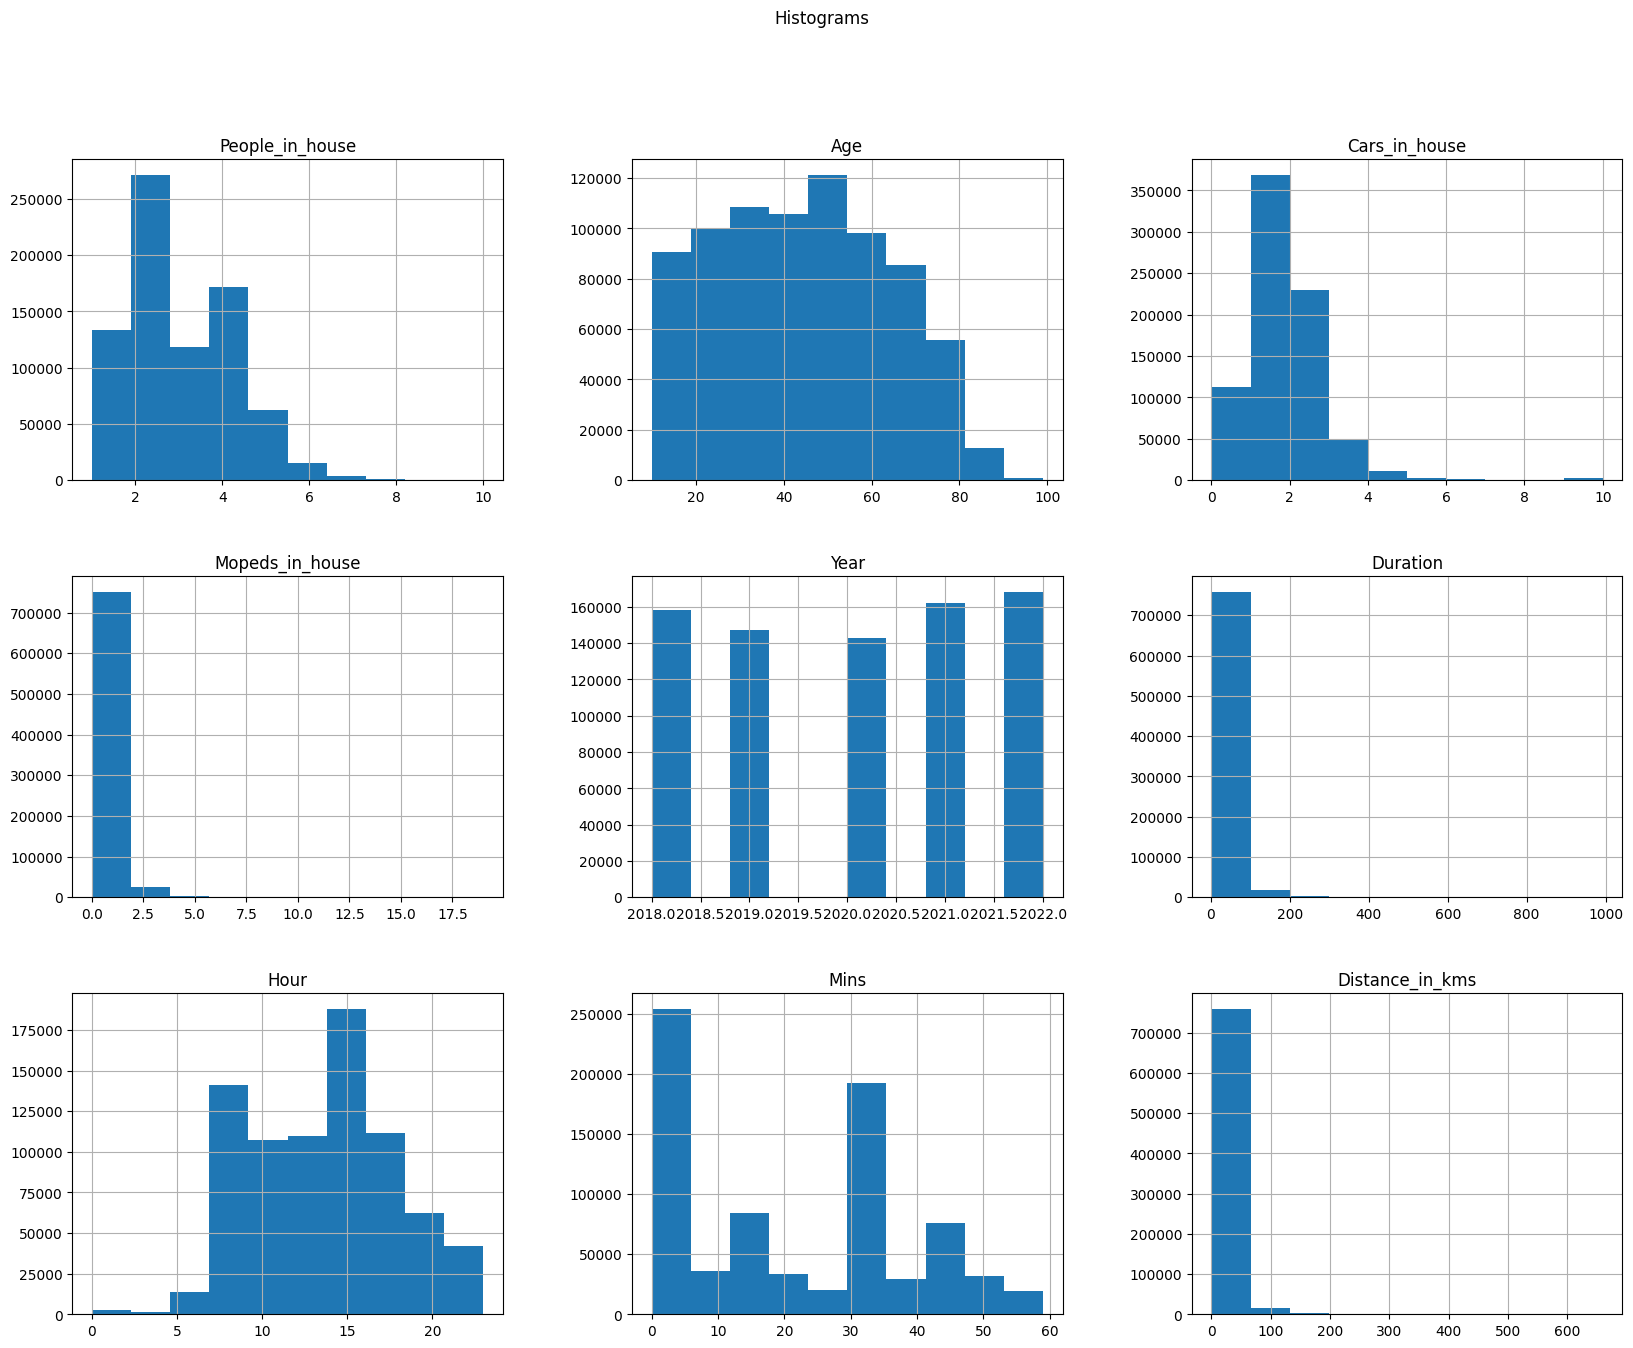

In [827]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

We see that there are outliers in Mopeds, Distance and Duration. We will drop those samples

In [828]:
df = df[(df['Duration'] <= 200)]

In [829]:
df = df[(df['Distance_in_kms'] <= 150)]

In [830]:
df = df[(df['Mopeds_in_house'] <= 5)]

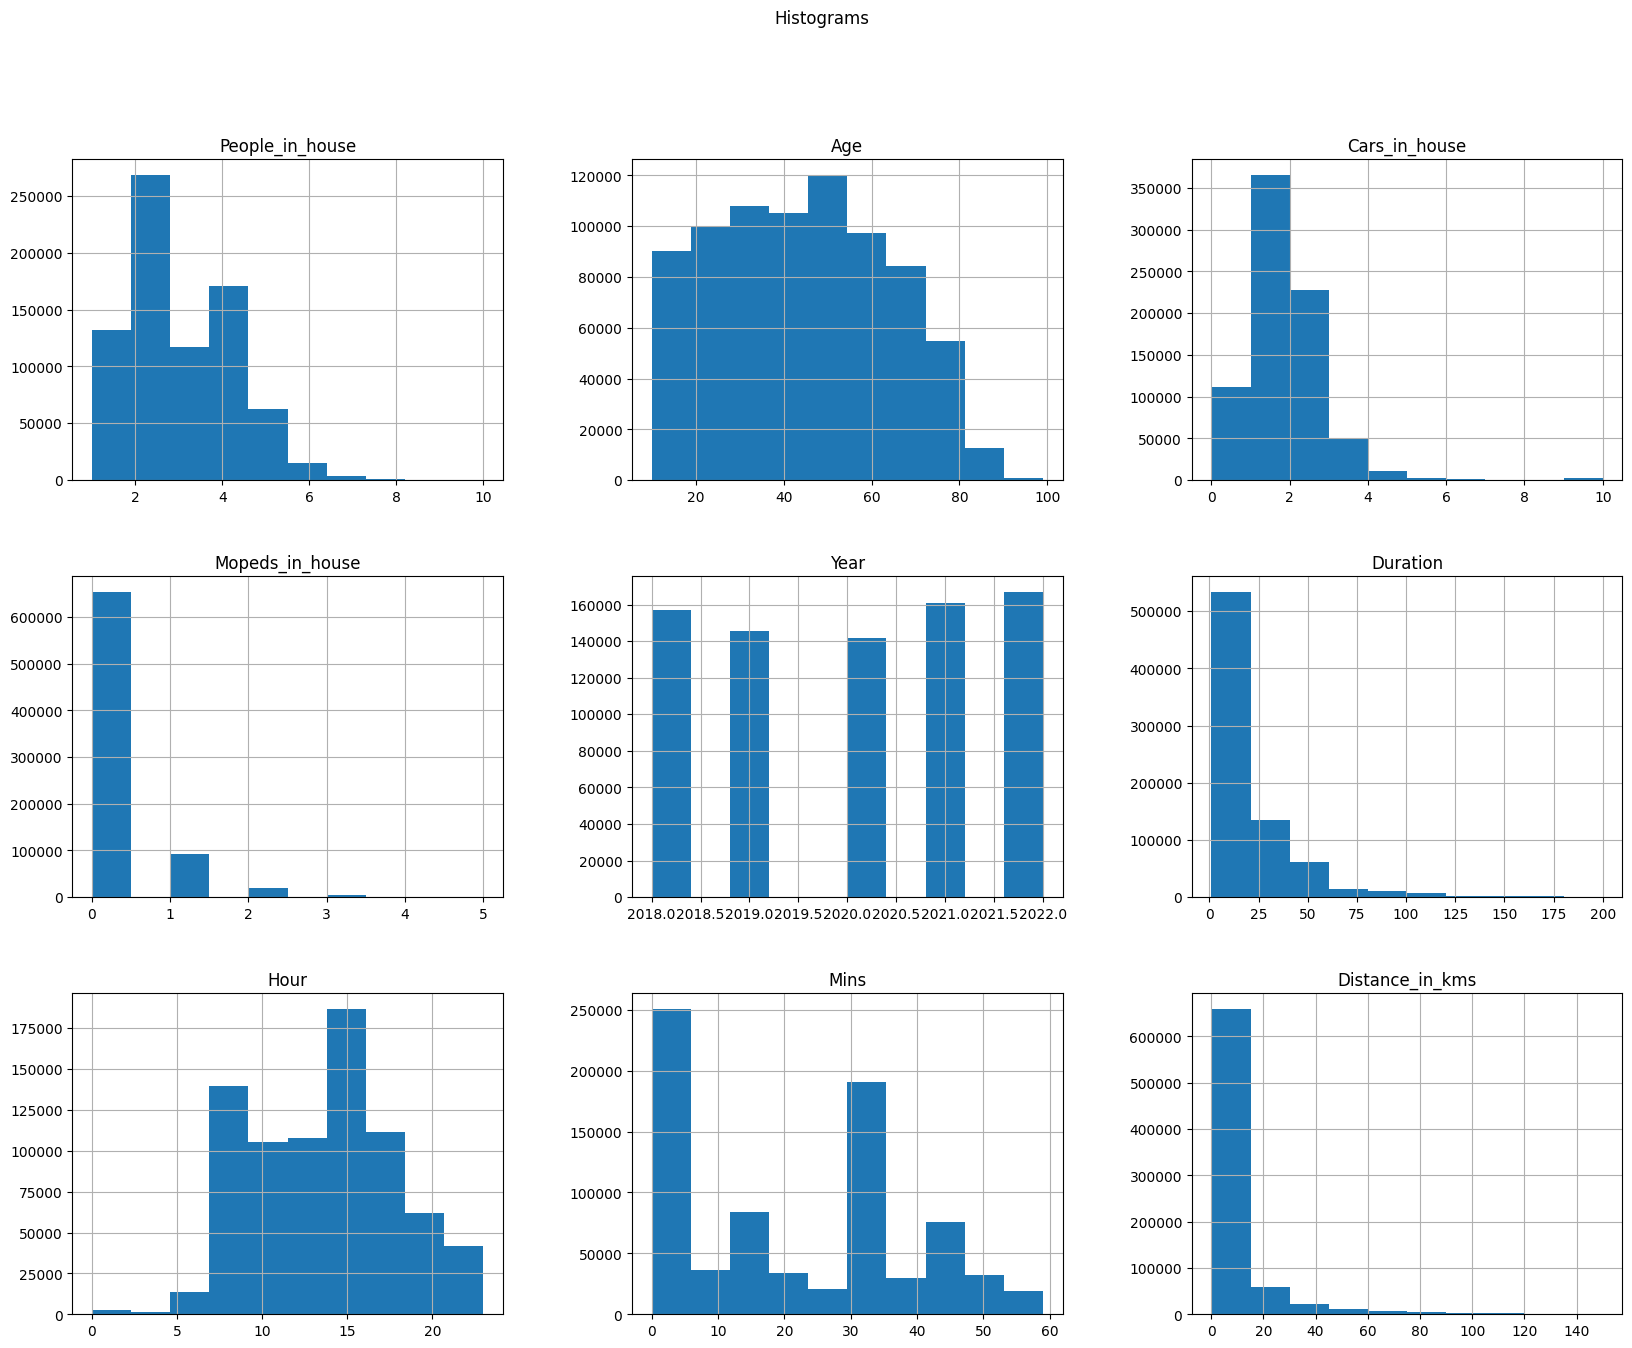

In [831]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

In [832]:
df.shape

(772265, 23)

In [833]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Hour,Mins,Distance_in_kms
count,772265.000000,772265.000000,772265.000000,772265.000000,772265.000000,772265.000000,772265.000000,772265.000000,772265.000000
mean,2.785633,44.144686,1.369007,0.199521,2020.045478,21.935668,13.631617,20.663768,8.905982
std,1.367287,19.706837,1.001107,0.533440,1.439998,23.689142,4.252918,17.488730,16.740038
min,1.000000,10.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.000000,0.100000
25%,2.000000,28.000000,1.000000,0.000000,2019.000000,9.000000,10.000000,0.000000,1.000000
50%,2.000000,44.000000,1.000000,0.000000,2020.000000,15.000000,14.000000,20.000000,3.000000
75%,4.000000,60.000000,2.000000,0.000000,2021.000000,30.000000,17.000000,30.000000,8.000000
max,10.000000,99.000000,10.000000,5.000000,2022.000000,200.000000,23.000000,59.000000,150.000000


# Explanatory Data Analysis

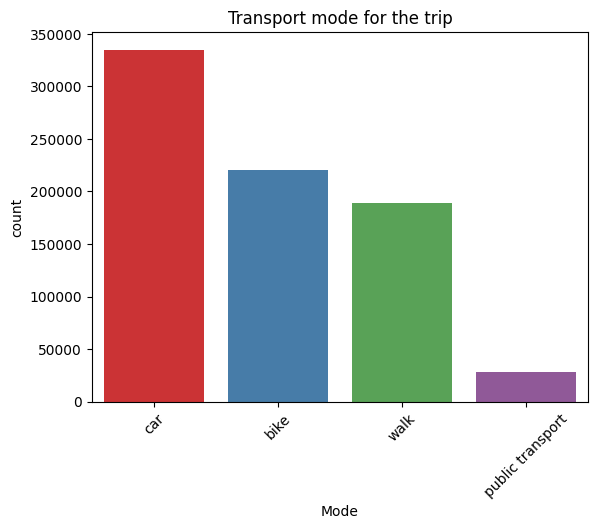

In [834]:
sns.countplot(x='Mode', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.title('Transport mode for the trip')
plt.show()

In [835]:
perc=df['Mode'].value_counts(True)*100
print(perc)

Mode
car                 43.373583
bike                28.547714
walk                24.438114
public transport     3.640590
Name: proportion, dtype: float64


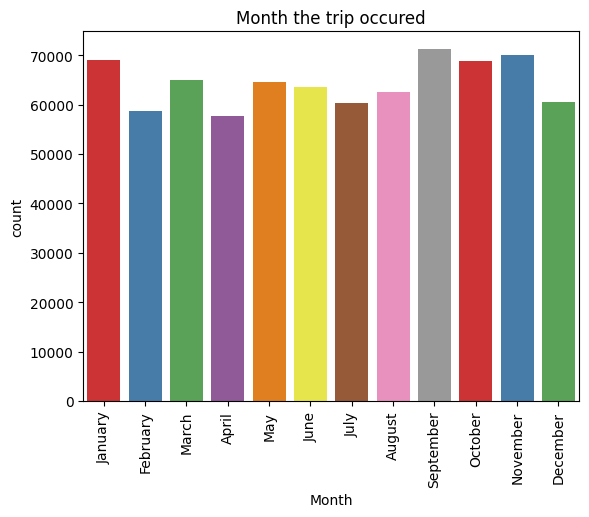

In [836]:
sns.countplot(x='Month', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Month the trip occured')
plt.show()

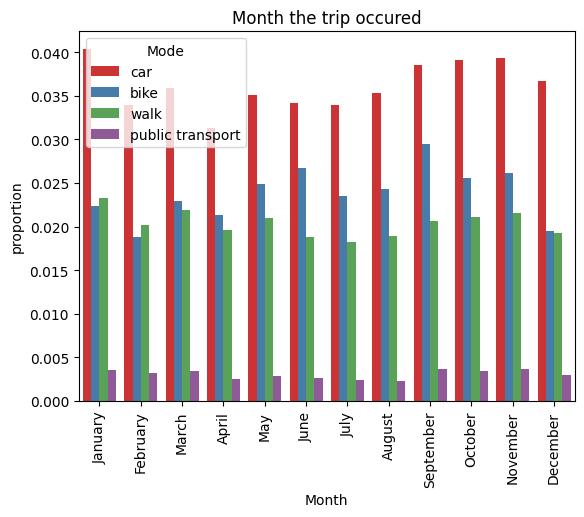

In [837]:
sns.countplot(x='Month', data=df, palette='Set1', hue='Mode', stat='proportion')
plt.xticks(rotation=90)
plt.title('Month the trip occured')
plt.show()

In [838]:
perc=df['Month'].value_counts(True)*100
print(perc)

Month
September    9.228697
November     9.059455
January      8.948094
October      8.923880
March        8.421332
May          8.365263
June         8.222696
August       8.091005
December     7.840573
July         7.810531
February     7.614744
April        7.473730
Name: proportion, dtype: float64


In [839]:
order_day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

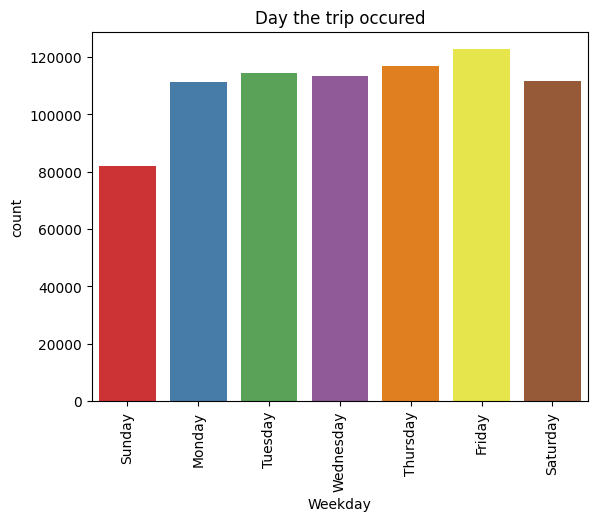

In [840]:
sns.countplot(x='Weekday', data=df, palette='Set1', order=order_day)
plt.xticks(rotation=90)
plt.title('Day the trip occured')
plt.show()

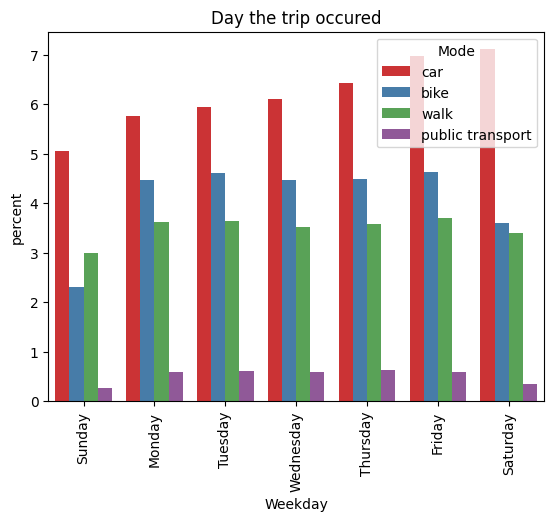

In [841]:
sns.countplot(x='Weekday', data=df, palette='Set1', hue='Mode', stat='percent', order=order_day)
plt.xticks(rotation=90)
plt.title('Day the trip occured')
plt.show()

In [842]:
perc=df['Weekday'].value_counts(True)*100
print(perc)

Weekday
Friday       15.886904
Thursday     15.138068
Tuesday      14.805151
Wednesday    14.684856
Saturday     14.451128
Monday       14.420698
Sunday       10.613196
Name: proportion, dtype: float64


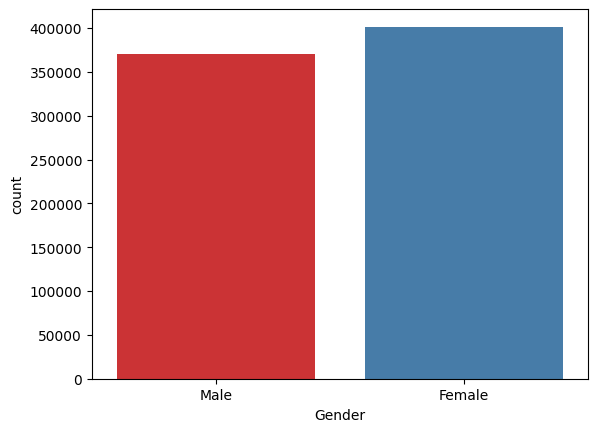

In [843]:
sns.countplot(x='Gender', data=df, palette='Set1')
plt.show()

In [844]:
perc=df['Gender'].value_counts(True)*100
print(perc)

Gender
Female    51.994976
Male      48.005024
Name: proportion, dtype: float64


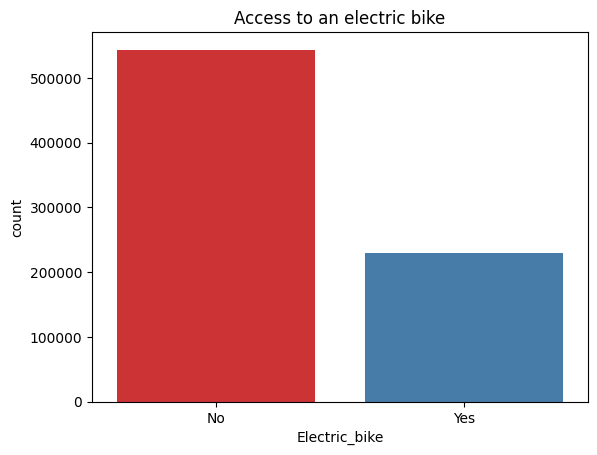

In [845]:
sns.countplot(x='Electric_bike', data=df, palette='Set1')
plt.title('Access to an electric bike')
plt.show()

In [846]:
perc=df['Electric_bike'].value_counts(True)*100
print(perc)

Electric_bike
No     70.373771
Yes    29.626229
Name: proportion, dtype: float64


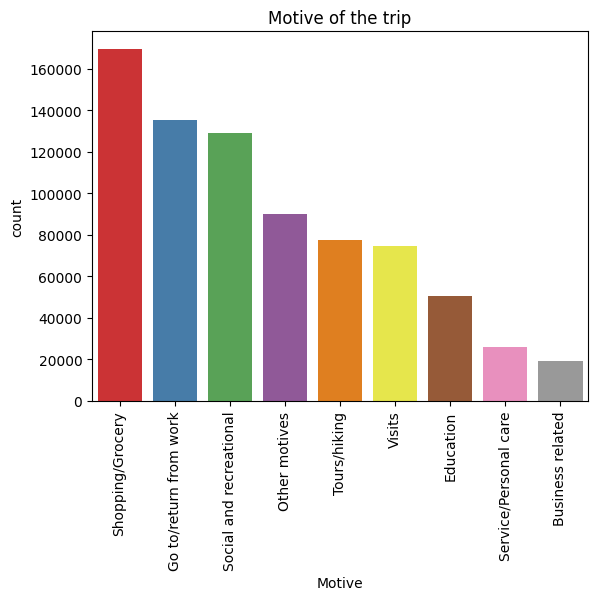

In [847]:
ordered_categories = df['Motive'].value_counts().index
sns.countplot(x='Motive', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Motive of the trip')
plt.show()

In [848]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.961762
Go to/return from work     17.522353
Social and recreational    16.704758
Other motives              11.646261
Tours/hiking               10.050436
Visits                      9.691492
Education                   6.545033
Service/Personal care       3.387050
Business related            2.490855
Name: proportion, dtype: float64


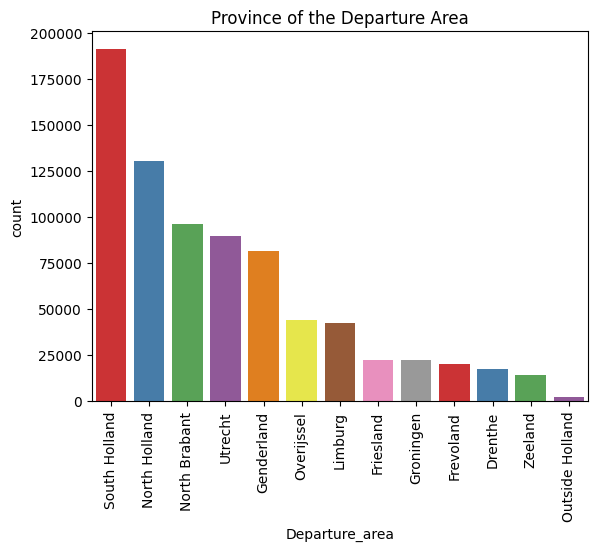

In [849]:
ordered_categories = df['Departure_area'].value_counts().index
sns.countplot(x='Departure_area', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Province of the Departure Area')
plt.show()

In [850]:
perc=df['Departure_area'].value_counts(True)*100
print(perc)

Departure_area
South Holland      24.744097
North Holland      16.888503
North Brabant      12.409341
Utrecht            11.567143
Genderland         10.534337
Overijssel          5.682894
Limburg             5.468978
Friesland           2.883855
Groningen           2.854202
Frevoland           2.614647
Drenthe             2.234078
Zeeland             1.803785
Outside Holland     0.314141
Name: proportion, dtype: float64


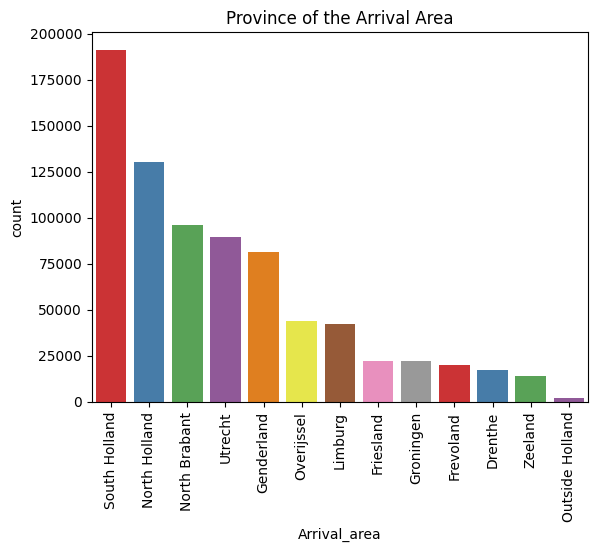

In [851]:
ordered_categories = df['Arrival_area'].value_counts().index
sns.countplot(x='Arrival_area', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Province of the Arrival Area')
plt.show()

In [852]:
perc=df['Arrival_area'].value_counts(True)*100
print(perc)

Arrival_area
South Holland      24.776210
North Holland      16.888892
North Brabant      12.417370
Utrecht            11.582941
Genderland         10.538092
Overijssel          5.683800
Limburg             5.471697
Friesland           2.882171
Groningen           2.856791
Frevoland           2.607395
Drenthe             2.227344
Zeeland             1.798087
Outside Holland     0.269208
Name: proportion, dtype: float64


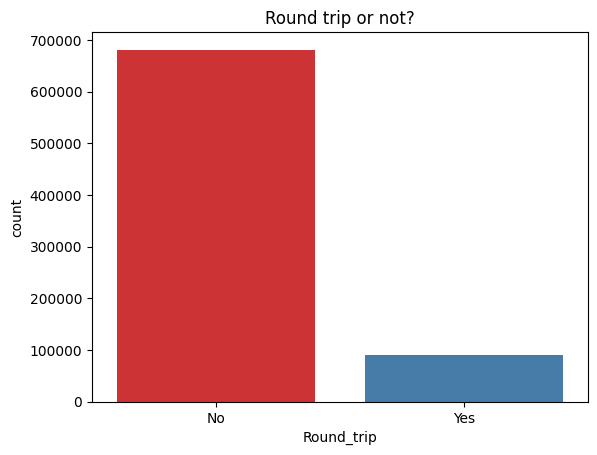

In [853]:
sns.countplot(x='Round_trip', data=df, palette='Set1')
plt.title('Round trip or not?')
plt.show()

In [854]:
perc=df['Round_trip'].value_counts(True)*100
print(perc)

Round_trip
No     88.216351
Yes    11.783649
Name: proportion, dtype: float64


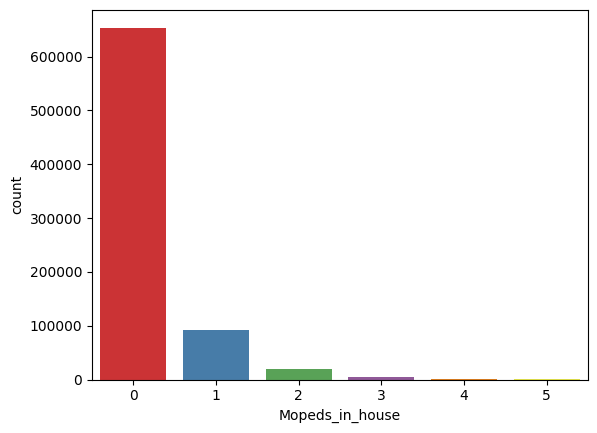

In [855]:
sns.countplot(x='Mopeds_in_house', data=df, palette='Set1')
plt.show()

In [856]:
perc=df['Mopeds_in_house'].value_counts(True)*100
print(perc)

Mopeds_in_house
0    84.689841
1    11.866652
2     2.577095
3     0.604326
4     0.192162
5     0.069924
Name: proportion, dtype: float64


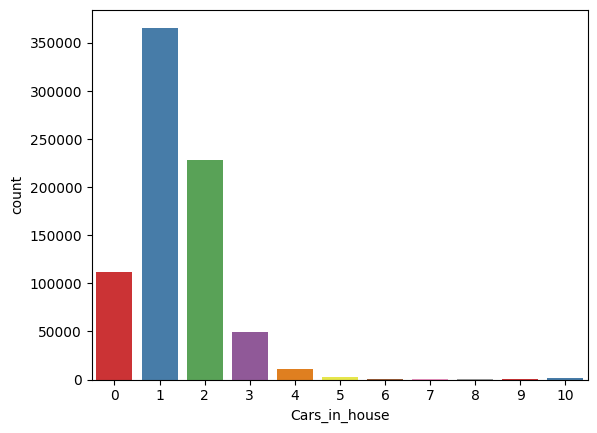

In [857]:
sns.countplot(x='Cars_in_house', data=df, palette='Set1')
plt.show()

In [858]:
perc=df['Cars_in_house'].value_counts(True)*100
print(perc)

Cars_in_house
1     47.388008
2     29.550867
0     14.435589
3      6.369964
4      1.477861
5      0.351952
10     0.232692
6      0.112785
7      0.039494
9      0.023438
8      0.017352
Name: proportion, dtype: float64


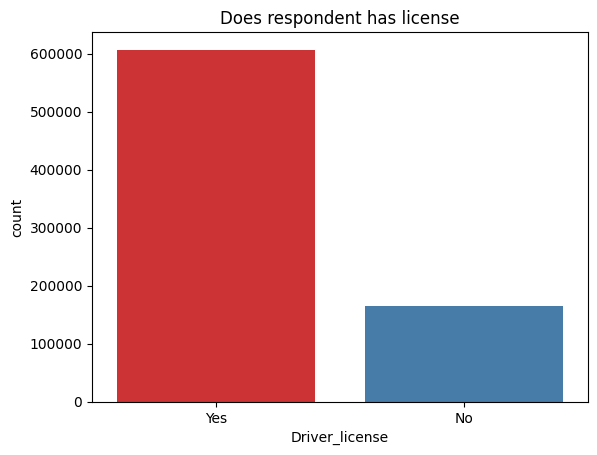

In [859]:
sns.countplot(x='Driver_license', data=df, palette='Set1')
plt.title('Does respondent has license')
plt.show()

In [860]:
perc=df['Driver_license'].value_counts(True)*100
print(perc)

Driver_license
Yes    78.569274
No     21.430726
Name: proportion, dtype: float64


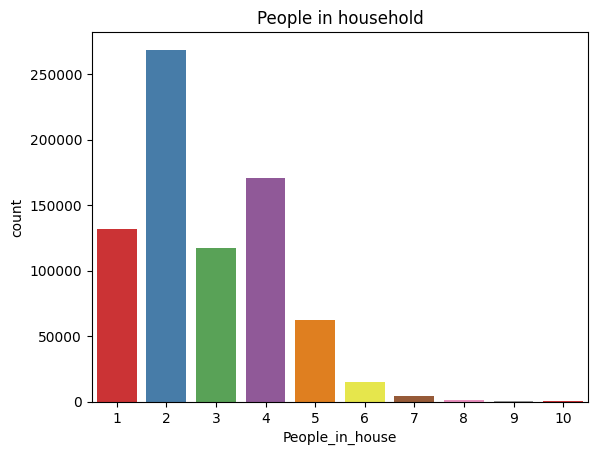

In [861]:
sns.countplot(x='People_in_house', data=df, palette='Set1')
plt.title('People in household')
plt.show()

In [862]:
perc=df['People_in_house'].value_counts(True)*100
print(perc)

People_in_house
2     34.796864
4     22.120645
1     17.109023
3     15.196209
5      8.046720
6      1.963963
7      0.515497
8      0.145157
9      0.056975
10     0.048947
Name: proportion, dtype: float64


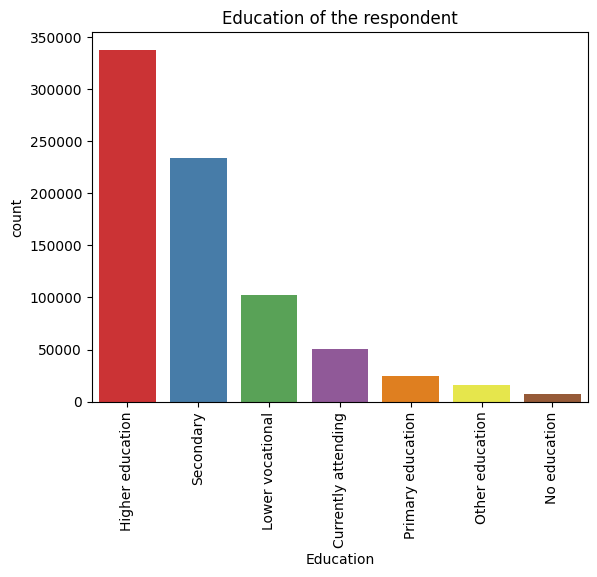

In [863]:
ordered_categories = df['Education'].value_counts().index
sns.countplot(x='Education', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Education of the respondent')
plt.show()

In [864]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education       43.722427
Secondary              30.213075
Lower vocational       13.218131
Currently attending     6.567823
Primary education       3.227649
Other education         2.135666
No education            0.915230
Name: proportion, dtype: float64


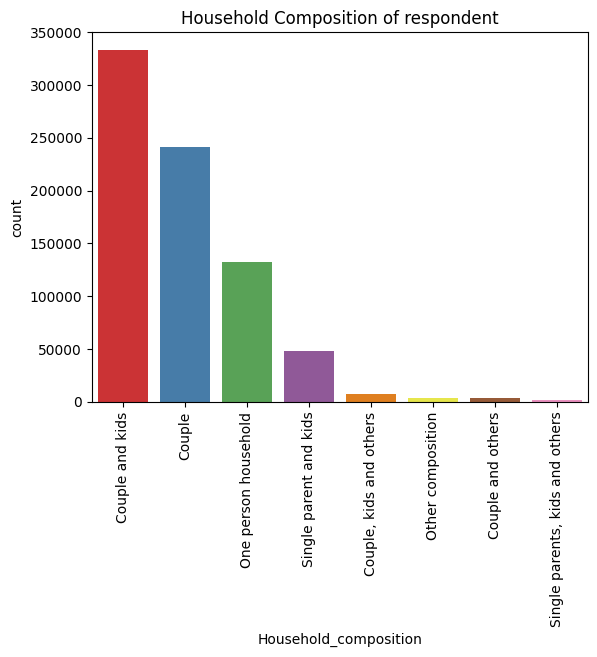

In [865]:
ordered_categories = df['Household_composition'].value_counts().index
sns.countplot(x='Household_composition', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Household Composition of respondent')
plt.show()

In [866]:
perc=df['Household_composition'].value_counts(True)*100
print(perc)

Household_composition
Couple and kids                    43.166918
Couple                             31.283821
One person household               17.109023
Single parent and kids              6.279321
Couple, kids and others             0.963529
Other composition                   0.523784
Couple and others                   0.448551
Single parents, kids and others     0.225052
Name: proportion, dtype: float64


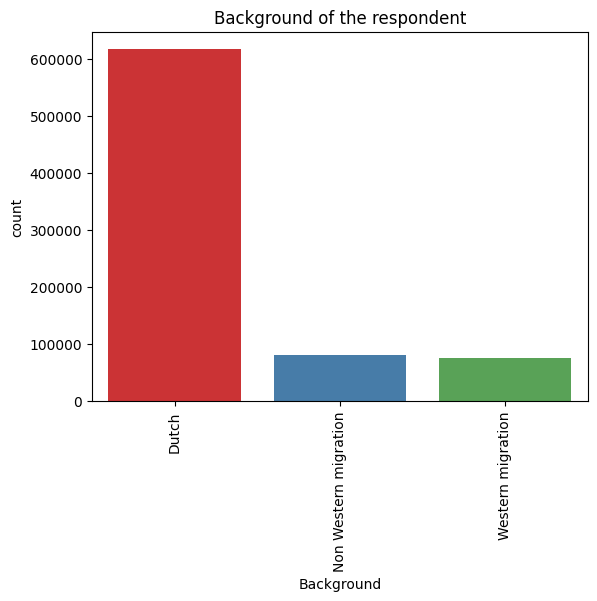

In [867]:
sns.countplot(x='Background', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Background of the respondent')
plt.show()

In [868]:
perc=df['Background'].value_counts(True)*100
print(perc)

Background
Dutch                    79.826484
Non Western migration    10.416373
Western migration         9.757143
Name: proportion, dtype: float64


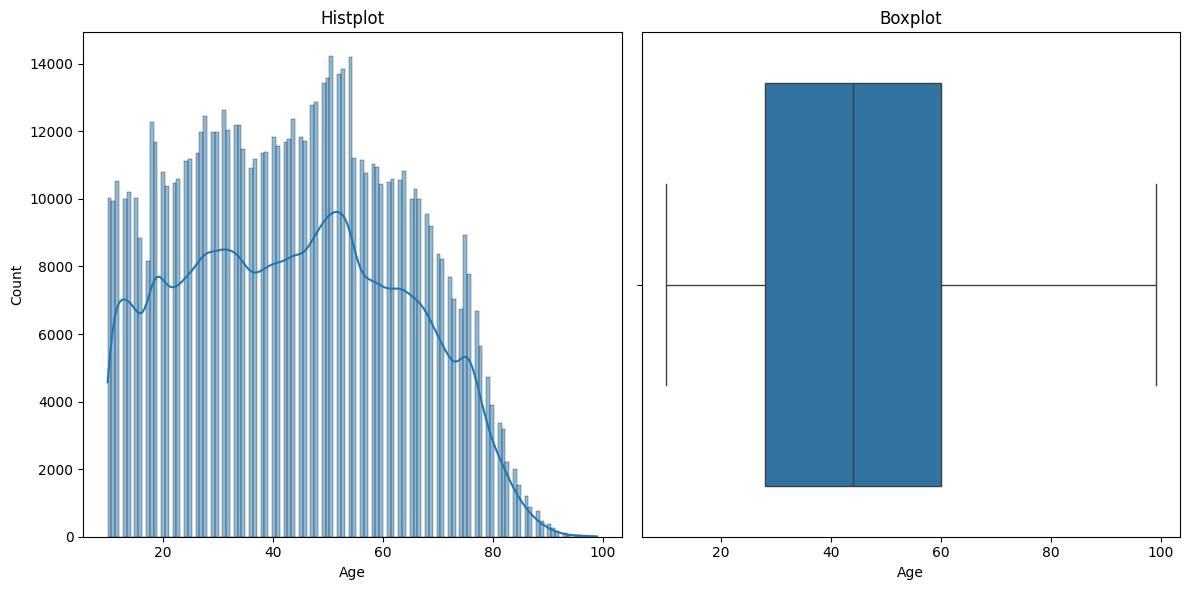

In [869]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Histplot')

sns.boxplot(x='Age', data=df, ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

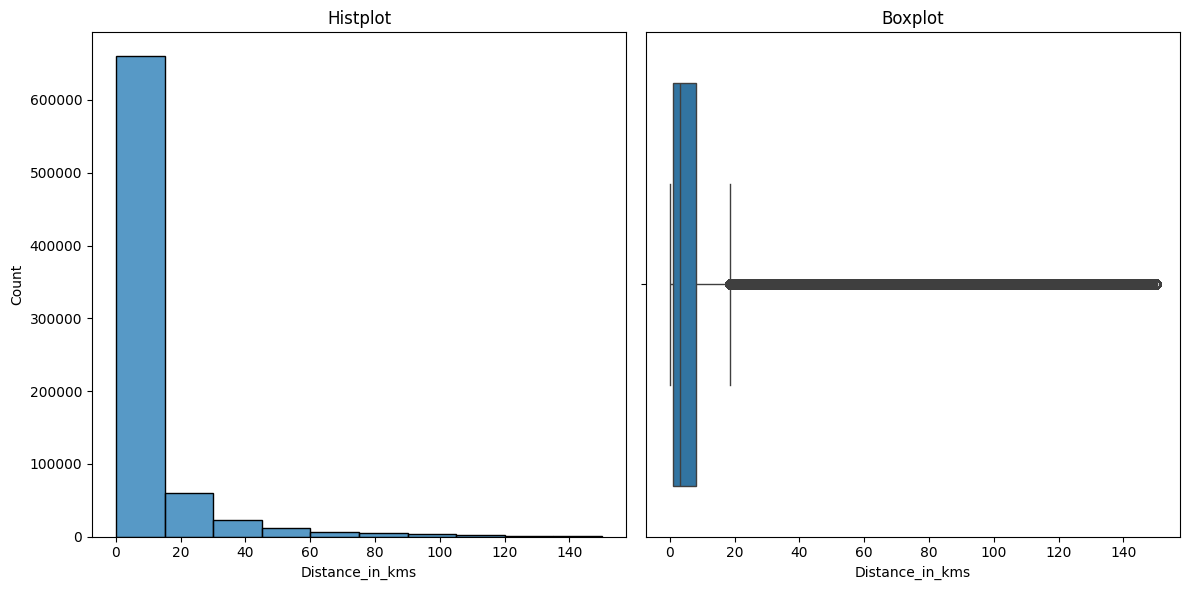

In [870]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(data=df, x='Distance_in_kms', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Distance_in_kms', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

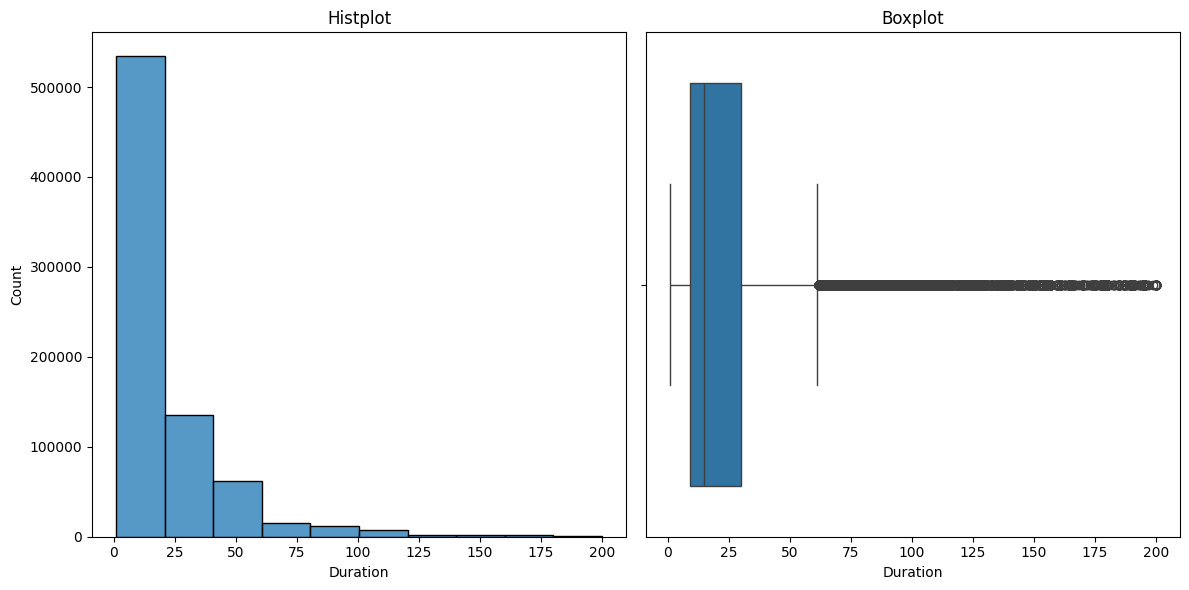

In [871]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Duration', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Duration', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

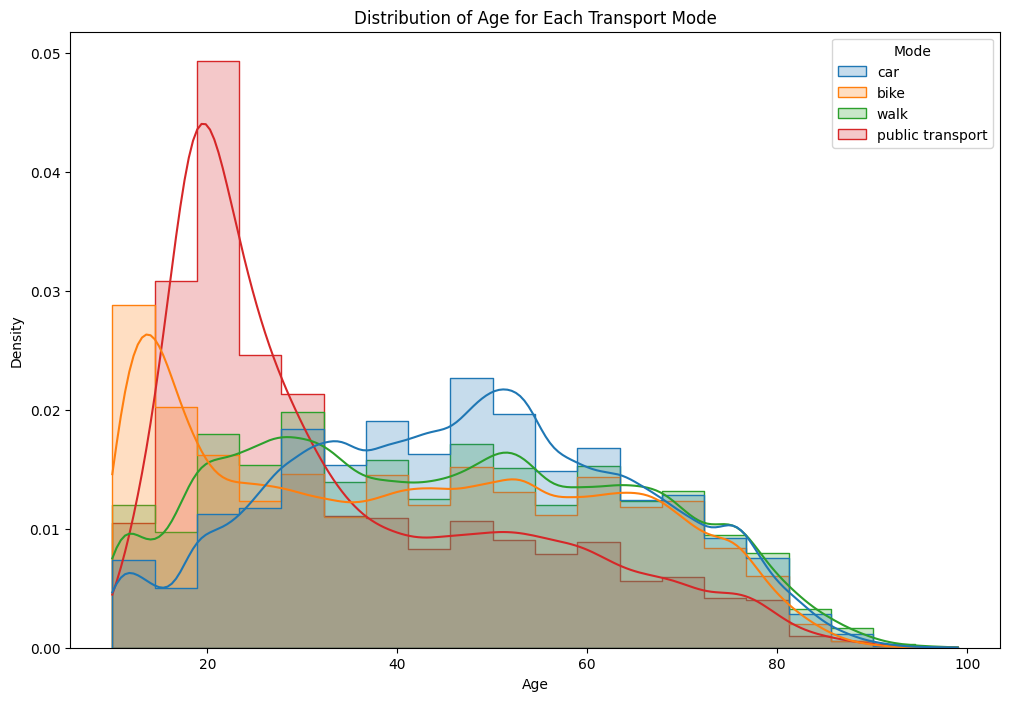

In [872]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Age', hue='Mode', bins=20, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Age for Each Transport Mode')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

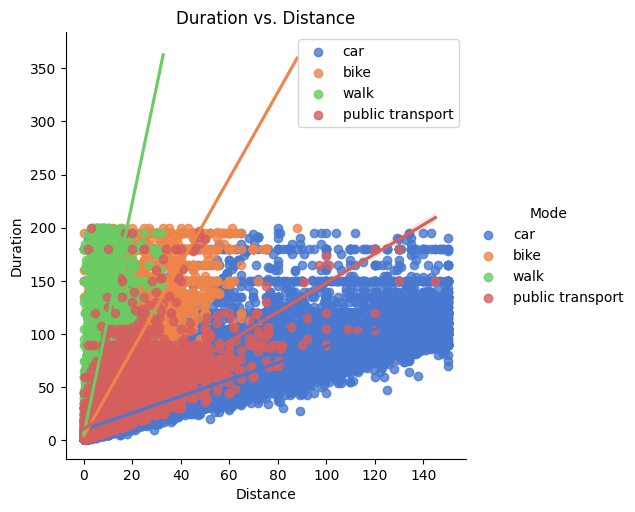

In [873]:
sns.lmplot(data=df, x='Distance_in_kms', y='Duration', hue='Mode', palette='muted')
plt.xlabel('Distance')
plt.ylabel('Duration')
plt.title('Duration vs. Distance')
plt.legend()
plt.show()

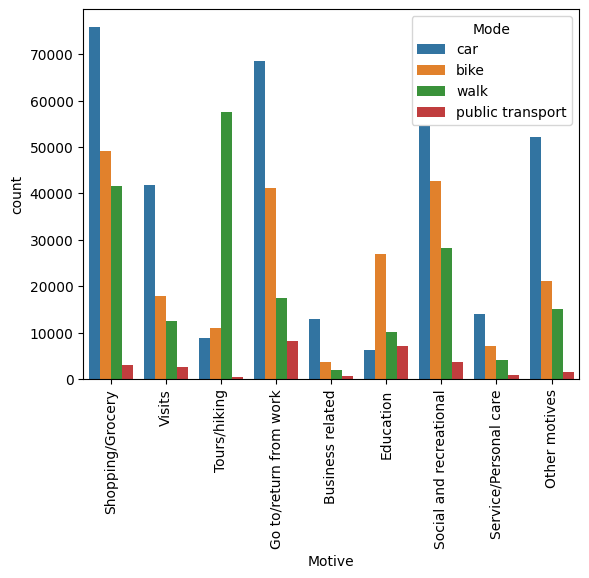

In [874]:
sns.countplot(x='Motive', data=df, hue="Mode")
plt.xticks(rotation=90)
plt.show()

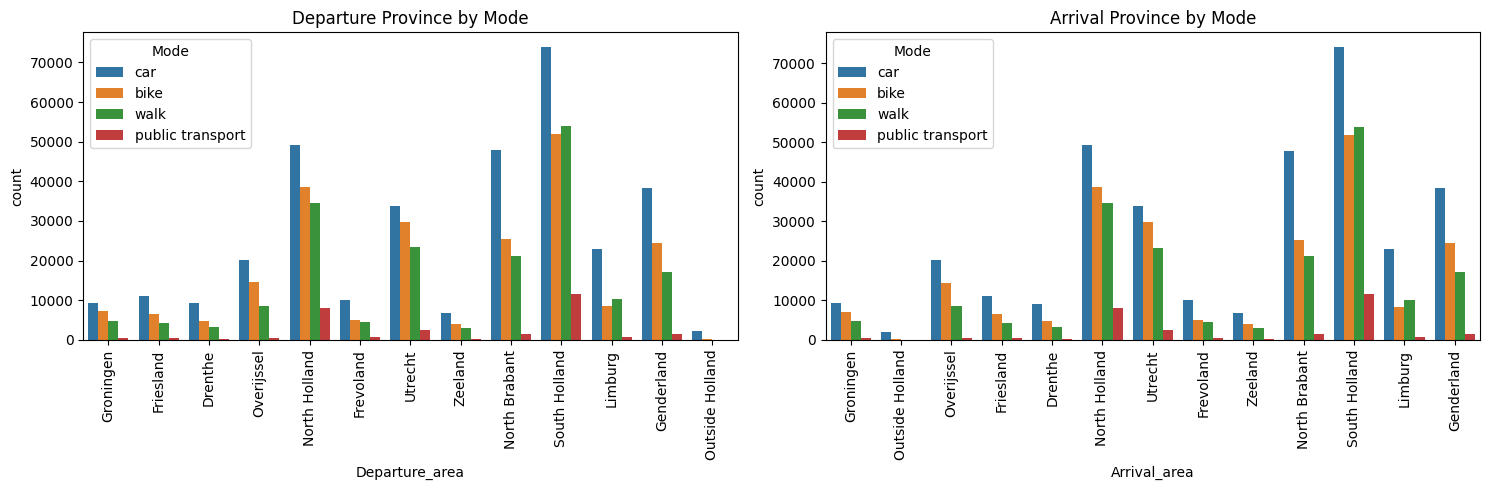

In [875]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

countplots = [
    (sns.countplot(x='Departure_area', data=df, hue="Mode", ax=axes[0]), 'Departure Province by Mode'),
    (sns.countplot(x='Arrival_area', data=df, hue="Mode", ax=axes[1]), 'Arrival Province by Mode'),
]

for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

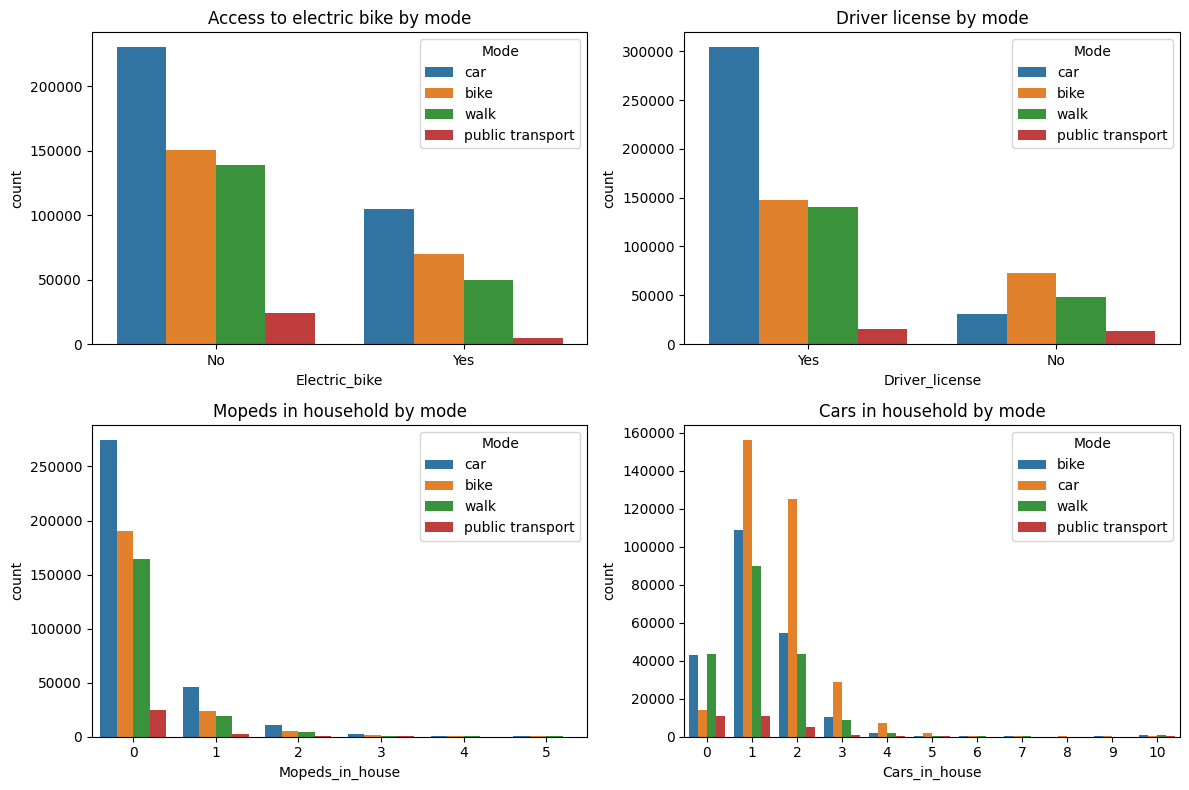

In [876]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Electric_bike', data=df, hue="Mode", ax=axes[0, 0]), 'Access to electric bike by mode'),
    (sns.countplot(x='Driver_license', data=df, hue="Mode", ax=axes[0, 1]), 'Driver license by mode'),
    (sns.countplot(x='Mopeds_in_house', data=df, hue="Mode", ax=axes[1, 0]), 'Mopeds in household by mode'),
    (sns.countplot(x='Cars_in_house', data=df, hue="Mode", ax=axes[1, 1]), 'Cars in household by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0)

plt.tight_layout()

plt.show()

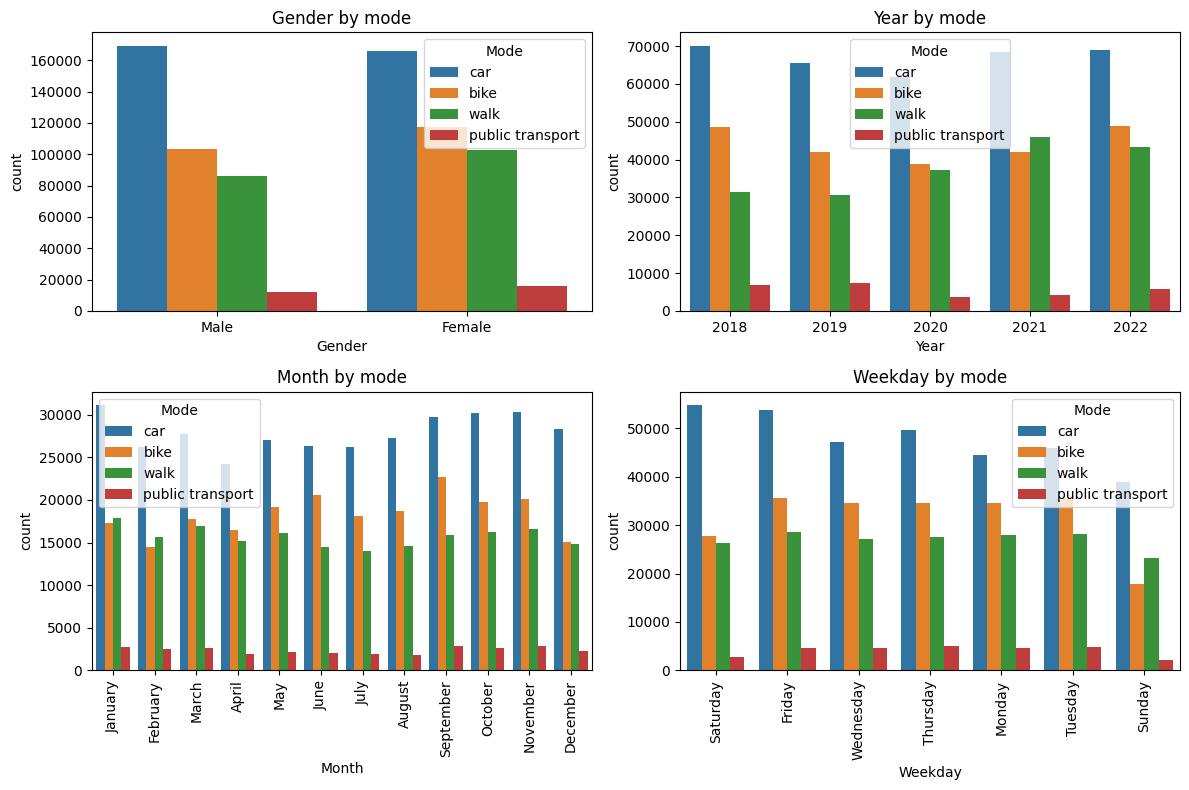

In [877]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Gender', data=df, hue="Mode", ax=axes[0, 0]), 'Gender by mode'),
    (sns.countplot(x='Year', data=df, hue="Mode", ax=axes[0, 1]), 'Year by mode'),
    (sns.countplot(x='Month', data=df, hue="Mode", ax=axes[1, 0]), 'Month by mode'),
    (sns.countplot(x='Weekday', data=df, hue="Mode", ax=axes[1, 1]), 'Weekday by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    if title in ['Month by mode', 'Weekday by mode']:
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

# DATA PREPROCESS

In [878]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Hour,Mins,Distance_in_kms
count,772265.000000,772265.000000,772265.000000,772265.000000,772265.000000,772265.000000,772265.000000,772265.000000,772265.000000
mean,2.785633,44.144686,1.369007,0.199521,2020.045478,21.935668,13.631617,20.663768,8.905982
std,1.367287,19.706837,1.001107,0.533440,1.439998,23.689142,4.252918,17.488730,16.740038
min,1.000000,10.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.000000,0.100000
25%,2.000000,28.000000,1.000000,0.000000,2019.000000,9.000000,10.000000,0.000000,1.000000
50%,2.000000,44.000000,1.000000,0.000000,2020.000000,15.000000,14.000000,20.000000,3.000000
75%,4.000000,60.000000,2.000000,0.000000,2021.000000,30.000000,17.000000,30.000000,8.000000
max,10.000000,99.000000,10.000000,5.000000,2022.000000,200.000000,23.000000,59.000000,150.000000


In [879]:
perc=df['Household_composition'].value_counts(True)*100
print(perc)

Household_composition
Couple and kids                    43.166918
Couple                             31.283821
One person household               17.109023
Single parent and kids              6.279321
Couple, kids and others             0.963529
Other composition                   0.523784
Couple and others                   0.448551
Single parents, kids and others     0.225052
Name: proportion, dtype: float64


In [880]:
value_mapping = {
                 "Single parent and kids":"Other",
                 "Couple, kids and others":"Other",
                 "Other composition":"Other",
                 "Couple and others":"Other",
                 "Single parents, kids and others":"Other"
                }
df['Household_composition'] = df['Household_composition'].replace(value_mapping)

In [881]:
perc=df['Household_composition'].value_counts(True)*100
print(perc)

Household_composition
Couple and kids         43.166918
Couple                  31.283821
One person household    17.109023
Other                    8.440237
Name: proportion, dtype: float64


In [882]:
perc=df['Departure_area'].value_counts(True)*100
print(perc)

Departure_area
South Holland      24.744097
North Holland      16.888503
North Brabant      12.409341
Utrecht            11.567143
Genderland         10.534337
Overijssel          5.682894
Limburg             5.468978
Friesland           2.883855
Groningen           2.854202
Frevoland           2.614647
Drenthe             2.234078
Zeeland             1.803785
Outside Holland     0.314141
Name: proportion, dtype: float64


In [883]:
value_mapping = {
                 "Limburg":"Other",
                 "Overijssel":"Other",
                 "Groningen":"Other",
                 "Friesland":"Other",
                 "Frevoland":"Other",
                 "Drenthe":"Other",
                 "Zeeland":"Other",
                 "Outside Holland":"Other"
                }
df['Departure_area'] = df['Departure_area'].replace(value_mapping)

In [884]:
perc=df['Departure_area'].value_counts(True)*100
print(perc)

Departure_area
South Holland    24.744097
Other            23.856578
North Holland    16.888503
North Brabant    12.409341
Utrecht          11.567143
Genderland       10.534337
Name: proportion, dtype: float64


In [885]:
perc=df['Arrival_area'].value_counts(True)*100
print(perc)

Arrival_area
South Holland      24.776210
North Holland      16.888892
North Brabant      12.417370
Utrecht            11.582941
Genderland         10.538092
Overijssel          5.683800
Limburg             5.471697
Friesland           2.882171
Groningen           2.856791
Frevoland           2.607395
Drenthe             2.227344
Zeeland             1.798087
Outside Holland     0.269208
Name: proportion, dtype: float64


In [886]:
value_mapping = {
                 "Limburg":"Other",
                 "Overijssel":"Other",
                 "Groningen":"Other",
                 "Friesland":"Other",
                 "Frevoland":"Other",
                 "Drenthe":"Other",
                 "Zeeland":"Other",
                 "Outside Holland":"Other"
                }
df['Arrival_area'] = df['Arrival_area'].replace(value_mapping)

In [887]:
perc=df['Arrival_area'].value_counts(True)*100
print(perc)

Arrival_area
South Holland    24.776210
Other            23.796495
North Holland    16.888892
North Brabant    12.417370
Utrecht          11.582941
Genderland       10.538092
Name: proportion, dtype: float64


In [888]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education       43.722427
Secondary              30.213075
Lower vocational       13.218131
Currently attending     6.567823
Primary education       3.227649
Other education         2.135666
No education            0.915230
Name: proportion, dtype: float64


In [889]:
value_mapping = {
                 "Other education":"Other",
                 "Primary education":"Other",
                 "No education":"Other",
                 "Currently attending":"Other",
                }
df['Education'] = df['Education'].replace(value_mapping)

In [890]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education    43.722427
Secondary           30.213075
Lower vocational    13.218131
Other               12.846368
Name: proportion, dtype: float64


In [891]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.961762
Go to/return from work     17.522353
Social and recreational    16.704758
Other motives              11.646261
Tours/hiking               10.050436
Visits                      9.691492
Education                   6.545033
Service/Personal care       3.387050
Business related            2.490855
Name: proportion, dtype: float64


In [892]:
value_mapping = {
                 "Service/Personal care":"Other motive",
                 "Education":"Other motive",
                 "Business related":"Other motive",
                 "Other motives": "Other motive"
                }
df['Motive'] = df['Motive'].replace(value_mapping)

In [893]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Other motive               24.069199
Shopping/Grocery           21.961762
Go to/return from work     17.522353
Social and recreational    16.704758
Tours/hiking               10.050436
Visits                      9.691492
Name: proportion, dtype: float64


In [894]:
one_hot_encoded = pd.get_dummies(df[['Departure_area', 'Background', 'Motive', 'Education']])

one_hot_encoded = one_hot_encoded.astype(int)

df = pd.concat([df, one_hot_encoded], axis=1)

In [895]:
df['Hour'] = df['Hour'].astype('category')
hour_dummies = pd.get_dummies(df['Hour'], prefix='Hour').astype(int)
df = pd.concat([df, hour_dummies], axis=1)

In [896]:
le=LabelEncoder()
features=["Gender","Electric_bike", "Driver_license", "Round_trip", "Arrival_area", "Holiday",]
for col in features:
    df[col]=le.fit_transform(df[col])

In [897]:
value_mapping = {"car":0, "bike":1, "walk":2, "public transport":3}
df['Mode'] = df['Mode'].replace(value_mapping)

In [898]:
value_mapping = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
df['Weekday'] = df['Weekday'].replace(value_mapping)

In [899]:
value_mapping = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
df['Month'] = df['Month'].replace(value_mapping)

In [900]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,One person household,1,42,Dutch,Secondary,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,One person household,1,42,Dutch,Secondary,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,One person household,1,42,Dutch,Secondary,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,One person household,1,42,Dutch,Secondary,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,Couple,1,42,Dutch,Secondary,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Other,0,49,Non Western migration,Higher education,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
817122,3,Other,0,49,Non Western migration,Higher education,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
817123,3,Other,0,49,Non Western migration,Higher education,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
817124,3,Other,0,49,Non Western migration,Higher education,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [901]:
df.columns

Index(['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Year', 'Month', 'Weekday',
       'Holiday', 'Round_trip', 'Motive', 'Departure_area', 'Arrival_area',
       'Duration', 'Hour', 'Mins', 'Mode', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_Other',
       'Departure_area_South Holland', 'Departure_area_Utrecht',
       'Background_Dutch', 'Background_Non Western migration',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other motive', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Tours/hiking',
       'Motive_Visits', 'Education_Higher education',
       'Education_Lower vocational', 'Education_Other', 'Education_Secondary',
       'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'H

In [902]:
drops = ['Departure_area', 'Background', 'Motive', 'Household_composition', 'Education', 'Hour', 'Mins', 'Arrival_area']
df = df.drop(drops, axis=1)
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Year,Month,Weekday,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,0,0,0,0,0
1,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,0,0,0,0,0
2,1,1,42,1,1,0,0,2018,1,6,...,0,1,0,0,0,0,0,0,0,0
3,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,1,0,0,0,0,0
4,2,1,42,1,1,0,0,2018,1,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,0,49,1,1,0,0,2022,12,4,...,0,1,0,0,0,0,0,0,0,0
817122,3,0,49,1,1,0,0,2022,12,4,...,0,0,1,0,0,0,0,0,0,0
817123,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,1,0,0,0,0,0,0
817124,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,1,0,0,0,0,0


In [903]:
df.isnull().any()

People_in_house                     False
Gender                              False
Age                                 False
Driver_license                      False
Cars_in_house                       False
Mopeds_in_house                     False
Electric_bike                       False
Year                                False
Month                               False
Weekday                             False
Holiday                             False
Round_trip                          False
Duration                            False
Mode                                False
Distance_in_kms                     False
Departure_area_Genderland           False
Departure_area_North Brabant        False
Departure_area_North Holland        False
Departure_area_Other                False
Departure_area_South Holland        False
Departure_area_Utrecht              False
Background_Dutch                    False
Background_Non Western migration    False
Background_Western migration      

In [904]:
csv_filename = 'data.csv'
df.to_csv(csv_filename, index=False)
zip_filename = 'data.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write(csv_filename)